In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preparing Dataframe old log layout

In [9]:
"""
dataframe=pd.read_csv('out/logs/log.csv', sep=";", names=["res","n_procs","runtime","error"])

#dataframe.set_index("res","n_procs")

speedupcol = dataframe.iloc[0]['runtime']/dataframe["runtime"]
dataframe["speedup"] = speedupcol

dataframe1 = dataframe[dataframe["res"] == 125]
dataframe2 = dataframe[dataframe["res"] == 500]
dataframe3 = dataframe[dataframe["res"] == 2000]
dataframe4 = dataframe[dataframe["res"] == 4000]

dataframe
"""

'\ndataframe=pd.read_csv(\'out/logs/log.csv\', sep=";", names=["res","n_procs","runtime","error"])\n\n#dataframe.set_index("res","n_procs")\n\nspeedupcol = dataframe.iloc[0][\'runtime\']/dataframe["runtime"]\ndataframe["speedup"] = speedupcol\n\ndataframe1 = dataframe[dataframe["res"] == 125]\ndataframe2 = dataframe[dataframe["res"] == 500]\ndataframe3 = dataframe[dataframe["res"] == 2000]\ndataframe4 = dataframe[dataframe["res"] == 4000]\n\ndataframe\n'

# Preparing Dataframe new log layout

In [10]:
#read df
dataframe=pd.read_csv('out/datacluster/all_logs.txt', sep="\t", names=["all"])

#zerlegen des df
res = dataframe.iloc[0:len(dataframe):13].reset_index().drop(['index'], axis=1)
res = res["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'res'}, axis=1)

dtype = dataframe.iloc[5:len(dataframe):13].reset_index().drop(['index'], axis=1)
dtype = dtype["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'dtype'}, axis=1)

nproc = dataframe.iloc[6:len(dataframe):13].reset_index().drop(['index'], axis=1)
nproc = nproc["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'nproc'}, axis=1).rename({'all': 'nproc'}, axis=1)

resi = dataframe.iloc[7:len(dataframe):13].reset_index().drop(['index'], axis=1)
resi = resi["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'resi'}, axis=1).rename({'all': 'resi'}, axis=1)

resimax = dataframe.iloc[8:len(dataframe):13].reset_index().drop(['index'], axis=1)
resimax = resimax["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'resimax'}, axis=1).rename({'all': 'resimax'}, axis=1)

err = dataframe.iloc[9:len(dataframe):13].reset_index().drop(['index'], axis=1)
err = err["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'err'}, axis=1).rename({'all': 'err'}, axis=1)

errmax = dataframe.iloc[10:len(dataframe):13].reset_index().drop(['index'], axis=1)
errmax = errmax["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'errmax'}, axis=1).rename({'all': 'errmax'}, axis=1)

runtime = dataframe.iloc[11:len(dataframe):13].reset_index().drop(['index'], axis=1)
runtime = runtime["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'runtime'}, axis=1).rename({'all': 'runtime'}, axis=1)

ittime = dataframe.iloc[12:len(dataframe):13].reset_index().drop(['index'], axis=1)
ittime = ittime["all"].str.split("=",expand=True).drop([0], axis=1).rename({1: 'ittime'}, axis=1).rename({'all': 'ittime'}, axis=1)

#mergen des df
dataframe = res
dataframe['dtype'] = dtype['dtype']
dataframe['nproc'] = pd.to_numeric(nproc['nproc'])
dataframe['resi'] = pd.to_numeric(resi['resi'])
dataframe['resimax'] = pd.to_numeric(resimax['resimax'])
dataframe['err'] = pd.to_numeric(err['err'])
dataframe['errmax'] = pd.to_numeric(errmax['errmax'])
dataframe['runtime'] = pd.to_numeric(runtime['runtime'])
dataframe['ittime'] = pd.to_numeric(ittime['ittime'])
dataframe

,res,dtype,nproc,resi,resimax,err,errmax,runtime,ittime
0,125,DOUBLE,1,6.472551e+06,323010.4,8080.332,197.1747,0.001372,0.000019
1,125,DOUBLE,12,6.795145e+06,339314.7,8046.118,196.6266,0.005275,0.000394
2,125,DOUBLE,16,6.788378e+06,338974.5,8050.589,196.7720,0.005239,0.000380
3,125,DOUBLE,2,6.796297e+06,339327.6,8042.767,196.6213,0.001505,0.000015
4,125,DOUBLE,24,6.848918e+06,329938.2,8082.102,201.4325,0.007625,0.000419
...,...,...,...,...,...,...,...,...,...
86,500,FLOAT,8,2.107914e+08,5264718.0,36397.800,245.2731,0.024757,0.000505
87,500,FLOAT,80,2.104248e+08,5258543.0,36410.180,246.9940,0.031562,0.000856
88,125,DOUBLE,1,6.472551e+06,323010.4,8080.332,197.1747,0.001358,0.000024
89,2000,DOUBLE,1,6.680434e+09,83385080.0,149699.100,261.2151,0.326821,0.013259


# new df for each res and dtype

In [11]:
res1 = dataframe[dataframe["res"] == "125"]
res1f = res1[res1["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res1d = res1[res1["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

res2 = dataframe[dataframe["res"] == "500"]
res2f = res2[res2["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res2d = res2[res2["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

res3 = dataframe[dataframe["res"] == "2000"]
res3f = res3[res3["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res3d = res3[res3["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

res4 = dataframe[dataframe["res"] == "4000"]
res4f = res4[res4["dtype"] == " FLOAT"].sort_values(by=['nproc'])
res4d = res4[res4["dtype"] == " DOUBLE"].sort_values(by=['nproc'])

# computing speedup

In [12]:
speedup1f = res1f.iloc[0]['runtime']/res1f["runtime"]
speedup1d = res1d.iloc[0]['runtime']/res1d["runtime"]
speedup2f = res2f.iloc[0]['runtime']/res2f["runtime"]
speedup2d = res2d.iloc[0]['runtime']/res2d["runtime"]
speedup3f = res3f.iloc[0]['runtime']/res3f["runtime"]
speedup3d = res3d.iloc[0]['runtime']/res3d["runtime"]
speedup4f = res4f.iloc[0]['runtime']/res4f["runtime"]
speedup4d = res4d.iloc[0]['runtime']/res4d["runtime"]

res1f["speedup"] = speedup1f
res1d["speedup"] = speedup1d
res2f["speedup"] = speedup2f
res2d["speedup"] = speedup2d
res3f["speedup"] = speedup3f
res3d["speedup"] = speedup3d
res4f["speedup"] = speedup4f
res4d["speedup"] = speedup4d

# Plotting Speedup

In [2]:
plt.figure(num = 3, figsize=(8, 5))
plt.plot(res1f["nproc"],res2f[speedup])
# plt.plot(x, y1, 
#          color='red',   
#          linewidth=1.0,  
#          linestyle='--' 
#         )

plt.show()

SyntaxError: invalid syntax (<ipython-input-2-108ab7108a61>, line 2)

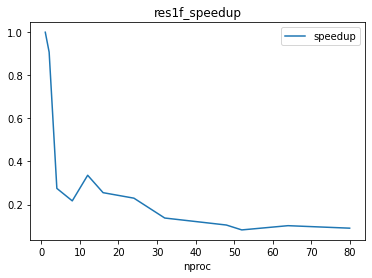

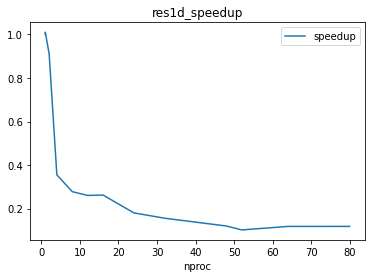

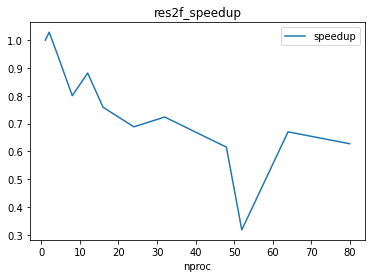

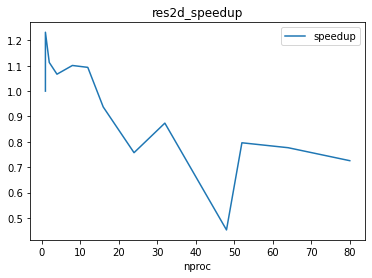

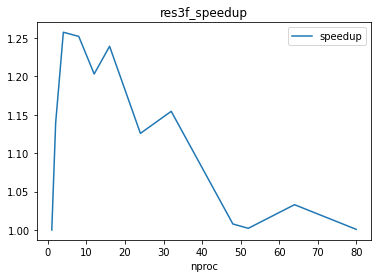

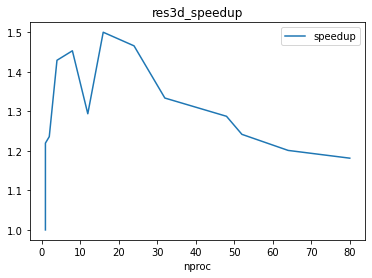

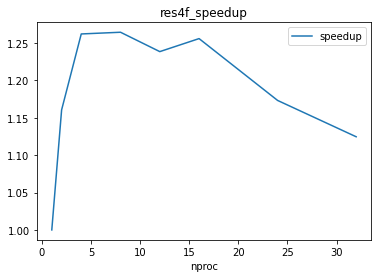

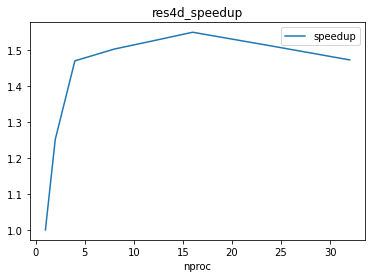

In [13]:
res1f_speedup = res1f.plot.line("nproc","speedup",title="res1f_speedup")
res1d_speedup = res1d.plot.line("nproc","speedup",title="res1d_speedup")
res2f_speedup = res2f.plot.line("nproc","speedup",title="res2f_speedup")
res2d_speedup = res2d.plot.line("nproc","speedup",title="res2d_speedup")
res3f_speedup = res3f.plot.line("nproc","speedup",title="res3f_speedup")
res3d_speedup = res3d.plot.line("nproc","speedup",title="res3d_speedup")
res4f_speedup = res4f.plot.line("nproc","speedup",title="res4f_speedup")
res4d_speedup = res4d.plot.line("nproc","speedup",title="res4d_speedup")

# Plotting Error

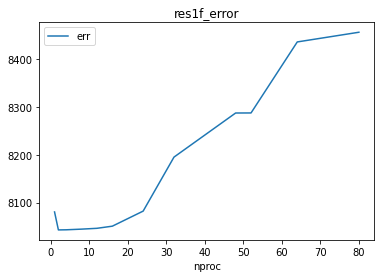

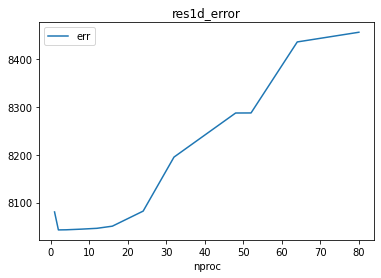

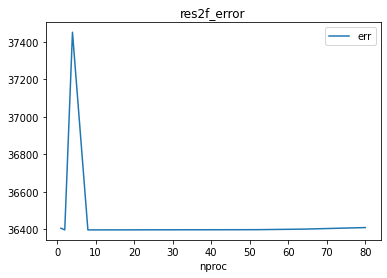

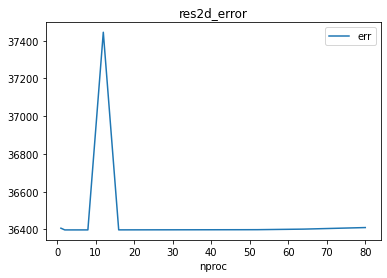

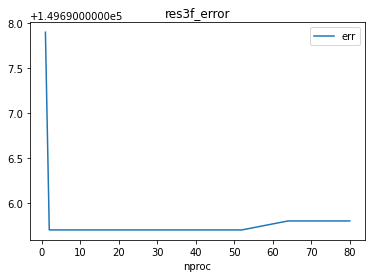

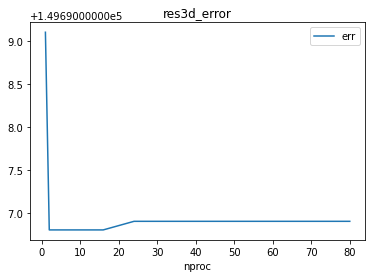

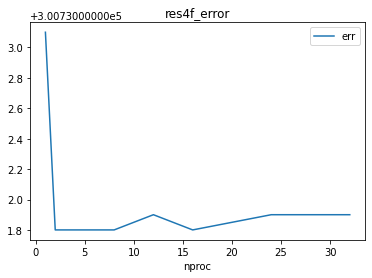

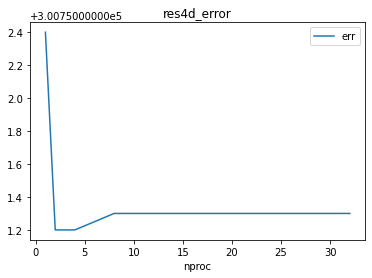

In [14]:
res1f_error = res1f.plot.line("nproc","err",title="res1f_error")
res1d_error = res1d.plot.line("nproc","err",title="res1d_error")
res2f_error = res2f.plot.line("nproc","err",title="res2f_error")
res2d_error = res2d.plot.line("nproc","err",title="res2d_error")
res3f_error = res3f.plot.line("nproc","err",title="res3f_error")
res3d_error = res3d.plot.line("nproc","err",title="res3d_error")
res4f_error = res4f.plot.line("nproc","err",title="res4f_error")
res4d_error = res4d.plot.line("nproc","err",title="res4d_error")

# save files

In [15]:
res1f_speedup.figure.savefig('out/plots/res1f_speedup.png')
res1d_speedup.figure.savefig('out/plots/res1d_speedup.png')
res2f_speedup.figure.savefig('out/plots/res2f_speedup.png')
res2d_speedup.figure.savefig('out/plots/res2d_speedup.png')
res3f_speedup.figure.savefig('out/plots/res3f_speedup.png')
res3d_speedup.figure.savefig('out/plots/res3d_speedup.png')
res4f_speedup.figure.savefig('out/plots/res4f_speedup.png')
res4d_speedup.figure.savefig('out/plots/res4d_speedup.png')

res1f_error.figure.savefig('out/plots/res1f_error.png')
res1d_error.figure.savefig('out/plots/res1d_error.png')
res2f_error.figure.savefig('out/plots/res2f_error.png')
res2d_error.figure.savefig('out/plots/res2d_error.png')
res3f_error.figure.savefig('out/plots/res3f_error.png')
res3d_error.figure.savefig('out/plots/res3d_error.png')
res4f_error.figure.savefig('out/plots/res4f_error.png')
res4d_error.figure.savefig('out/plots/res4d_error.png')